使用pytorch搭建神经网络

导入依赖库：

In [1]:
import torch as tch
import torch.nn as nn
import numpy as np
from sklearn.datasets import make_blobs
from matplotlib import pyplot as plt
%matplotlib inline


定义数据集：

In [2]:
samples = 5000
#Let's divide the toy dataset into training (80%) and rest for validation.
train_split = int(samples*0.8)

#Create a dummy classification dataset
X, y = make_blobs(n_samples=samples, centers=2, n_features=64, 
cluster_std=10, random_state=2020)
y = y.reshape(-1,1)

#Convert the numpy datasets to Torch Tensors
X,y = tch.from_numpy(X),tch.from_numpy(y)
X,y =X.float(),y.float()

#Split the datasets into train and test(validation)
# 按顺序划分
X_train, x_test = X[:train_split], X[train_split:]
Y_train, y_test = y[:train_split], y[train_split:]

#Print shapes of each dataset
print("X_train.shape:",X_train.shape)
print("x_test.shape:",x_test.shape)
print("Y_train.shape:",Y_train.shape)
print("y_test.shape:",y_test.shape)
print("X.dtype",X.dtype)
print("y.dtype",y.dtype)

X_train.shape: torch.Size([4000, 64])
x_test.shape: torch.Size([1000, 64])
Y_train.shape: torch.Size([4000, 1])
y_test.shape: torch.Size([1000, 1])
X.dtype torch.float32
y.dtype torch.float32


定义一个前向神经网络：

In [3]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        tch.manual_seed(2020)
        self.fc1 = nn.Linear(64, 256)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(256, 1024)
        self.relu2 = nn.ReLU()
        self.out = nn.Linear(1024, 1)
        self.final = nn.Sigmoid()
    
    def forward(self, x):
        op = self.fc1(x)
        op = self.relu1(op)
        op = self.fc2(op)
        op = self.relu2(op)

        op = self.out(op)
        y = self.final(op)
        return y

定义损失、优化、训练函数：

In [4]:
#Define function for training a network
def train_network(model,optimizer,loss_function,num_epochs,batch_size,X_train,Y_train):
    #Explicitly start model training
    model.train()
    loss_across_epochs = []
    for epoch in range(num_epochs):
        train_loss= 0.0
        for i in range(0,X_train.shape[0],batch_size): # 小批次逐个批次训练
            #Extract train batch from X and Y
            input_data = X_train[i:min(X_train.shape[0],i+batch_size)]
            labels = Y_train[i:min(X_train.shape[0],i+batch_size)]

            #set the gradients to zero before starting to do backpropragation
            #做后向传播之前，将梯度设置为0
            optimizer.zero_grad()
            #Forward pass 
            output_data = model(input_data)

            #Caculate loss
            loss = loss_function(output_data, labels)

            #Backpropogate
            loss.backward()

            #Update weights
            optimizer.step()
            train_loss += loss.item() * batch_size
        
        print("Epoch: {} - Loss:{:.4f}".format(epoch+1,train_loss ))
        loss_across_epochs.extend([train_loss])

    # #Predict
    # y_test_pred = model(x_test)
    # a =np.where(y_test_pred>0.5,1,0)
    return(loss_across_epochs)
    ###------------END OF FUNCTION--------------

定义损失函数与模型：

In [5]:
#Define loss function
loss_function = nn.BCELoss()

# MSELoss (mean squared error loss), CrossEntropyLoss (for multi-class classification), and BCELoss (binary cross-entropy loss),

num_epochs = 20
batch_size=16
#Calling the function for training and pass model, optimizer, loss and related paramter

使用不同优化器训练：

RMSProp optimizer：

In [6]:
model = NeuralNetwork()
rmsprp_optimizer = tch.optim.RMSprop(model.parameters(), lr=0.01, alpha=0.9, eps=1e-08, weight_decay=0.1, momentum=0.1, centered=True)
print("RMSProp...")
rmsprop_loss = train_network(model,rmsprp_optimizer,loss_function,num_epochs,batch_size,X_train,Y_train)

RMSProp...
Epoch: 1 - Loss:5882.0931
Epoch: 2 - Loss:818.0934
Epoch: 3 - Loss:2173.0420
Epoch: 4 - Loss:2101.5048
Epoch: 5 - Loss:1120.3915
Epoch: 6 - Loss:2757.4468
Epoch: 7 - Loss:994.1973
Epoch: 8 - Loss:878.2424
Epoch: 9 - Loss:3472.7540
Epoch: 10 - Loss:4199.3060
Epoch: 11 - Loss:1352.6665
Epoch: 12 - Loss:1171.3573
Epoch: 13 - Loss:1171.4818
Epoch: 14 - Loss:741.2357
Epoch: 15 - Loss:1738.0733
Epoch: 16 - Loss:1037.7858
Epoch: 17 - Loss:2979.8040
Epoch: 18 - Loss:323.6905
Epoch: 19 - Loss:2625.3718
Epoch: 20 - Loss:4027.9944


Adam optimizer：

In [7]:
model = NeuralNetwork()
adam_optimizer = tch.optim.Adam(model.parameters(),lr= 0.001)
print("Adam...")
adam_loss = train_network(model,adam_optimizer,loss_function,num_epochs,batch_size,X_train,Y_train)

Adam...
Epoch: 1 - Loss:107.9976
Epoch: 2 - Loss:8.7377
Epoch: 3 - Loss:8.2711
Epoch: 4 - Loss:0.8971
Epoch: 5 - Loss:0.2219
Epoch: 6 - Loss:0.0017
Epoch: 7 - Loss:0.0016
Epoch: 8 - Loss:0.0014
Epoch: 9 - Loss:0.0012
Epoch: 10 - Loss:0.0011
Epoch: 11 - Loss:0.0009
Epoch: 12 - Loss:0.0008
Epoch: 13 - Loss:0.0007
Epoch: 14 - Loss:0.0006
Epoch: 15 - Loss:0.0005
Epoch: 16 - Loss:0.0005
Epoch: 17 - Loss:0.0004
Epoch: 18 - Loss:0.0004
Epoch: 19 - Loss:0.0003
Epoch: 20 - Loss:0.0003


SGD optimizer：

In [8]:
model = NeuralNetwork()
sgd_optimizer = tch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
print("SGD...")
sgd_loss = train_network(model,sgd_optimizer,loss_function,num_epochs,batch_size,X_train,Y_train)


SGD...
Epoch: 1 - Loss:915.0239
Epoch: 2 - Loss:1612.2528
Epoch: 3 - Loss:885.7357
Epoch: 4 - Loss:1179.8257
Epoch: 5 - Loss:1200.0001
Epoch: 6 - Loss:1200.0001
Epoch: 7 - Loss:1200.0001
Epoch: 8 - Loss:1200.0000
Epoch: 9 - Loss:1200.0000
Epoch: 10 - Loss:1200.0000
Epoch: 11 - Loss:1200.0000
Epoch: 12 - Loss:1200.0000
Epoch: 13 - Loss:1200.0000
Epoch: 14 - Loss:1200.0000
Epoch: 15 - Loss:1200.0000
Epoch: 16 - Loss:1200.0000
Epoch: 17 - Loss:1200.0000
Epoch: 18 - Loss:1200.0000
Epoch: 19 - Loss:1200.0000
Epoch: 20 - Loss:1200.0000


结果展示:

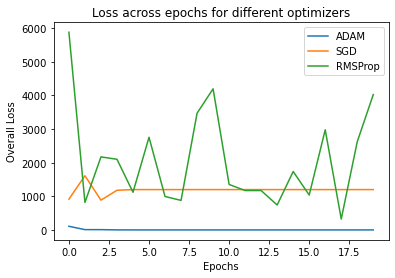

In [9]:
#Plot the losses for each optimizer across epochs
epochs = range(0,10)
ax = plt.subplot(111)
ax.plot(adam_loss,label="ADAM")
ax.plot(sgd_loss,label="SGD")
ax.plot(rmsprop_loss,label="RMSProp")
ax.legend()
plt.xlabel("Epochs")
plt.ylabel("Overall Loss")
plt.title("Loss across epochs for different optimizers")
plt.show()

In [10]:
# # Download an example image from the pytorch website
# import urllib
# url, filename = ("https://github.com/pytorch/hub/raw/master/images/deeplab1.png", "deeplab1.png")
# try: urllib.URLopener().retrieve(url, filename)
# except: urllib.request.urlretrieve(url, filename)
